In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv,eig, det
from math import sqrt,exp,pi,log
import pickle
from joblib import dump, load
from sklearn.preprocessing import StandardScaler

import shap

from joblib import dump,load
from sklearn import utils,preprocessing
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

import matplotlib as mpl
import matplotlib.pyplot as plt

# read data

In [2]:
data = pd.read_excel('list-MAZ-0.5.xlsx',header=0)
data = data.iloc[:,1:]
X = data.iloc[:,1:]
Y = data.iloc[:,0]
data

,GH,qM,qA,qZ,qH,d(Z1-H),d(A-H),d(Z2-H),d(M-H),Hs,...,3_Homo,3_Lumo,3_Rop,3_Rv,1_Vl,1_M,2_Vl,2_M,3_Vl,3_M
0,0.464116,-0.314989,-0.830711,0.484375,0.3502,1.42517,3.26414,5.25855,6.23820,-6.5826,...,-5.5066,4.1941,0.9712,0.9712,9,58.933195,14,118.710,5,30.973762
1,0.200072,-1.406078,-1.845850,1.287764,-0.4798,1.03135,2.49985,3.96829,5.00568,-11.3967,...,-7.0898,4.1526,0.5154,0.5154,6,51.996100,14,72.630,5,14.007000
2,0.376193,-0.823222,-0.642283,0.517556,0.3381,1.42355,3.09960,4.96351,6.11495,-6.3756,...,-5.5066,4.1941,0.9712,0.9712,6,51.996100,14,72.630,5,30.973762
3,-0.471543,-1.409322,-1.713511,1.221781,-0.4570,1.03056,2.68202,4.33925,5.34974,-11.1779,...,-7.0898,4.1526,0.5154,0.5154,6,51.996100,14,118.710,5,14.007000
4,0.228472,-0.865556,-0.830817,0.622631,0.3302,1.42208,3.26576,5.26266,6.37365,-6.0103,...,-5.5066,4.1941,0.9712,0.9712,6,51.996100,14,118.710,5,30.973762
5,0.147400,-0.443778,-0.814861,0.509314,0.3262,1.42363,3.26866,5.28008,6.29837,-6.1351,...,-5.5066,4.1941,0.9712,0.9712,8,55.845000,14,118.710,5,30.973762
6,0.174719,-2.005611,-1.787800,1.407817,-0.4500,1.03324,2.54048,3.95292,5.10953,-9.9616,...,-7.0898,4.1526,0.5154,0.5154,18,178.490000,14,72.630,5,14.007000
7,0.216068,-1.614411,-0.652517,0.719489,0.3731,1.42406,3.13723,4.92047,6.27520,-6.6848,...,-5.5066,4.1941,0.9712,0.9712,18,178.490000,14,72.630,5,30.973762
8,0.314636,-1.922600,-2.921689,1.953689,-0.4392,1.03432,2.45408,3.74295,4.94912,-9.4832,...,-7.0898,4.1526,0.5154,0.5154,18,178.490000,4,28.085,5,14.007000
9,0.231024,-1.593589,-1.607278,1.191831,0.3672,1.42378,3.07889,4.78632,6.18886,-6.1126,...,-5.5066,4.1941,0.9712,0.9712,18,178.490000,4,28.085,5,30.973762


# Shapley additive explanations

In [9]:
shap.initjs()

In [10]:
explainer = shap.TreeExplainer(best_regr)
shap_values = explainer(X)
shap_values

.values =
array([[ 0.00197182,  0.00060936,  0.02659882, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00086278,  0.00775839, -0.00041635, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00018371,  0.06844498, -0.00386483, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00164046, -0.00070674, -0.0060088 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00463613, -0.00628688, -0.0003081 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02393675, -0.00185019, -0.00603332, ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

.base_values =
array([0.07419527, 0.07419527, 0.07419527, 0.07419527, 0.07419527,
       0.07419527, 0.07419527, 0.07419527, 0.07419527, 0.07419527,
       0.07419527, 0.07419527, 0.07419527, 0.07419527, 0.07419527,
       0.07419527, 0.07419527, 0.07419527, 0.07419527, 0.07419527,
       0.07419527, 0.07419527, 0.07419527, 0.07419527, 0.07419527,
       0.07

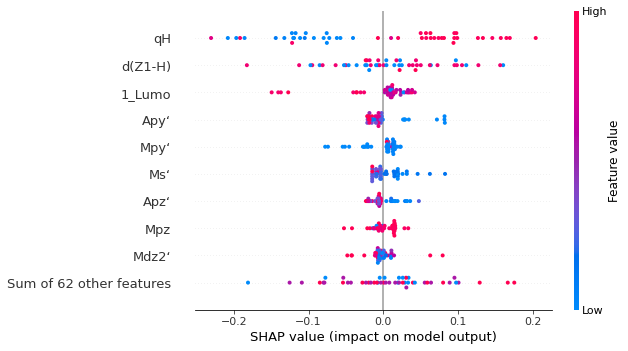

<Figure size 432x288 with 0 Axes>

In [28]:
f1 = plt.figure()
shap.plots.beeswarm(shap_values)
f1.savefig('Shap_beeswarm.pdf', bbox_inches = 'tight')
plt.clf()

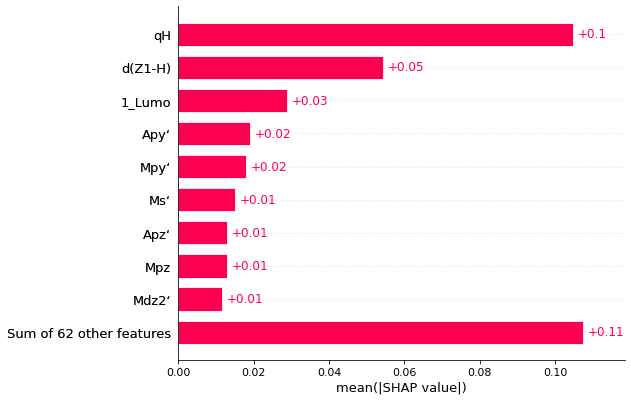

<Figure size 432x288 with 0 Axes>

In [27]:
f2 = plt.figure()
shap.plots.bar(shap_values)
f2.savefig('Shap_bar.pdf', bbox_inches = 'tight')
plt.clf()

# mutual information

In [29]:
def p_mkde(x,X,h):    
    N = X.shape[0]
    Sxy = np.cov(X.transpose())
    sum = 0
    if Sxy.shape == ():
        d = 1
        detS=Sxy
        for i in range(N):
            p2 = np.dot(np.dot((np.array(x)-np.array(X[i])),1/Sxy),(np.array(x)-np.array(X[i])).transpose())
            sum = sum+1/sqrt(pow((2*pi),d)*detS)*exp(-p2/(2*pow(h,2)))
    else:
        d = X.shape[1]
        detS=det(Sxy)
        for i in range(N):
            p2 = np.dot(np.dot((np.array(x.transpose())-np.array(X.iloc[i,:])),np.linalg.inv(Sxy)),(np.array(x.transpose())-np.array(X.iloc[i,:])).transpose())
            sum = sum+1/sqrt(pow((2*pi),d)*detS)*exp(-p2/(2*pow(h,2)))
    pxy = 1/(N*pow(h,d))*sum
    return pxy

In [30]:
def MutualInfo(X,Y):
    d = 2
    nx = len(X)
    hx = pow(4/(d+2),1/(d+2))*pow(nx,-1/(d+4))
    Xall = pd.concat([X,Y], axis=1)
    sum1 = 0
    for i in range(nx):
        pxy=p_mkde(pd.DataFrame([X[i],Y[i]]),Xall,hx)
        px=p_mkde(X[i],X,hx)
        py=p_mkde(Y[i],Y,hx)
        sum1=sum1+log(pxy/(px*py))
    Ixy=sum1/nx
    lambda1 = sqrt(1-exp(-2*Ixy))
    return Ixy,lambda1

In [31]:
X = data.iloc[:,1:]
Y = data.iloc[:,0]
Num = X.shape[1]
Mi_list = []

In [32]:
for i in range(Num):
    Ixy,lambda1 = MutualInfo(X.iloc[:,i],Y)
    Mi_list.append(Ixy)

In [33]:
Mi_list = pd.DataFrame(Mi_list).transpose()
Mi_list.columns = data.columns.values.tolist()[1:]
Mi_list

,qM,qA,qZ,qH,d(Z1-H),d(A-H),d(Z2-H),d(M-H),Hs,Zs,...,3_Homo,3_Lumo,3_Rop,3_Rv,1_Vl,1_M,2_Vl,2_M,3_Vl,3_M
0,0.117542,0.096567,0.170444,0.131604,0.19486,0.19762,0.116646,0.122613,0.178749,0.114406,...,0.131489,0.122067,0.129031,0.129031,0.08168,0.044703,0.019448,0.060976,0.065301,0.189057


# MI values based on Shap bar

In [44]:
[Mi_list.iloc[0,3],Mi_list.iloc[0,4],Mi_list.iloc[0,54],Mi_list.iloc[0,32],Mi_list.iloc[0,36],Mi_list.iloc[0,35],Mi_list.iloc[0,33],Mi_list.iloc[0,19],Mi_list.iloc[0,41]]

[0.13160363578333714,
 0.19486033154915847,
 0.18111908704131222,
 0.08911579019806663,
 0.049251825210197435,
 0.016284924330457657,
 0.08871883837784954,
 0.07289090842633612,
 0.16393233536874502]

# Pearson correlation coefficients

In [36]:
PCC_GH = abs(data.corr().iloc[0:1,1:])
PCC_GH

,qM,qA,qZ,qH,d(Z1-H),d(A-H),d(Z2-H),d(M-H),Hs,Zs,...,3_Homo,3_Lumo,3_Rop,3_Rv,1_Vl,1_M,2_Vl,2_M,3_Vl,3_M
GH,0.076916,0.186117,0.179108,0.428041,0.312147,0.141522,0.202728,0.215882,0.299076,0.37919,...,0.376687,0.395491,0.380346,0.380346,0.056597,0.00754,0.098202,0.192383,0.2403,0.058236


# PCC values based on Shap bar

In [42]:
[PCC_GH.iloc[0,3],PCC_GH.iloc[0,4],PCC_GH.iloc[0,54],PCC_GH.iloc[0,32],PCC_GH.iloc[0,36],PCC_GH.iloc[0,35],PCC_GH.iloc[0,33],PCC_GH.iloc[0,19],PCC_GH.iloc[0,41]]

[0.42804125860821773,
 0.3121473641679647,
 0.2540377068221187,
 0.2743283525816544,
 0.05381183762832942,
 0.0005204875010026866,
 0.2840232219806071,
 0.1633856547845639,
 0.2537081799208401]

# Spearman correlation coefficient

In [39]:
SCC_GH = abs(data.corr('spearman').iloc[0:1,1:])
SCC_GH

,qM,qA,qZ,qH,d(Z1-H),d(A-H),d(Z2-H),d(M-H),Hs,Zs,...,3_Homo,3_Lumo,3_Rop,3_Rv,1_Vl,1_M,2_Vl,2_M,3_Vl,3_M
GH,0.110725,0.183239,0.24327,0.42043,0.372568,0.221884,0.235128,0.182696,0.302974,0.311767,...,0.347022,0.347022,0.347022,0.347022,0.012462,0.012573,0.134645,0.185326,0.139785,0.347022


# SCC values based on Shap bar

In [43]:
[SCC_GH.iloc[0,3],SCC_GH.iloc[0,4],SCC_GH.iloc[0,54],SCC_GH.iloc[0,32],SCC_GH.iloc[0,36],SCC_GH.iloc[0,35],SCC_GH.iloc[0,33],SCC_GH.iloc[0,19],SCC_GH.iloc[0,41]]

[0.4204298740772905,
 0.37256764472156767,
 0.17563404844287556,
 0.3247937472861485,
 0.061658706035605734,
 0.12993920972644377,
 0.259552757273122,
 0.3253365175857577,
 0.19756838905775076]